In [80]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기

In [81]:
#https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set_style("whitegrid") # choose a style for seaborn figure

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd

# mpg(miles per gallon).csv 데이터 가져오기
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")
display(health.head()) 
print(health.info())  

,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK,DRK,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN
0,36,M,9,165,60,72.1,1.2,1.5,1,1,...,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN
1,27,F,13,150,65,81.0,0.8,0.8,1,1,...,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN
2,11,F,12,155,55,70.0,0.6,0.7,1,1,...,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN
3,31,M,13,160,70,90.8,1.0,1.0,1,2,...,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0
4,41,F,12,155,50,75.2,1.5,1.2,1,1,...,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SIDO               10000 non-null  int64  
 1   SEX                10000 non-null  object 
 2   AGE_GROUP          10000 non-null  int64  
 3   HEIGHT             10000 non-null  int64  
 4   WEIGHT             10000 non-null  int64  
 5   WAIST              10000 non-null  float64
 6   SIGHT_LEFT         10000 non-null  float64
 7   SIGHT_RIGHT        10000 non-null  float64
 8   HEAR_LEFT          10000 non-null  int64  
 9   HEAR_RIGHT         10000 non-null  int64  
 10  BP_HIGH            9912 non-null   float64
 11  BP_LWST            9912 non-null   float64
 12  BLDS               9912 non-null   float64
 13  TOT_CHOLE          4044 non-null   float64
 14  TRIGLYCERIDE       4044 non-null   float64
 15  HDL_CHOLE          4044 non-null   float64
 16  LDL_CHOLE          3977

In [84]:
df_health = health.groupby('SIDO' , as_index = False).agg( meanGAMMA_GTP = ('GAMMA_GTP', 'mean'))
df_health

,SIDO,meanGAMMA_GTP
0,11,36.813996
1,26,37.577778
2,27,35.316430
3,28,37.587387
4,29,41.388489
5,30,33.579268
6,31,47.390947
7,36,30.157895
8,41,37.629091
9,42,41.355882


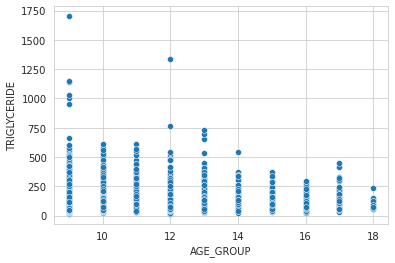

In [106]:
sns.scatterplot(data = health, x = 'AGE_GROUP', y = 'TRIGLYCERIDE')
#40~50대 트리글리세라이드(지방의 한 형태로서 몸의 주요 에너지원) 수치가 높음. 
#혈 중 트리글리세라이드가 증가하는 것은, 이유가 분명하지 않으나 심혈관 질환으로 진행될 위험의 증가와 관련
#즉, 운동 부족, 과체중, 흡연, 과음 및 당뇨와 신질환 등의 질병 상태가 고트리글리세라이드혈증 및 심혈관 질환 위험도 증가에 기여

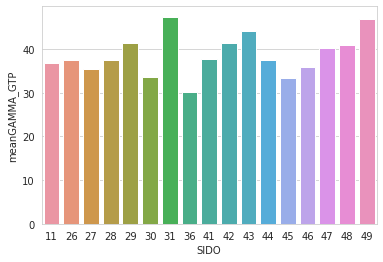

In [85]:
sns.barplot(data = df_health, x = 'SIDO', y = 'meanGAMMA_GTP')
#시/도에 따른 감마지티피 
#간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함, 쓸개즙(담즙) 배설 장애, 간세포 장애 발생 시 혈중에 증가하게 됨
#정상치 남성 11~63IU/L, 여성 8~35IU/L
#다른 표준항목들과 달리 시/도에 따른 차이가 극명. 
#특히나 눈에 띄게 감마지티피 수치가 높은 울산광역시(31), 제주특별자치도(49), 충청북도(43), 광주광역시(29), 강원도(42)는 
#감마지티피의 주요 원인이라고 볼 수 있는 음주를 줄이도록 하며 2년 마다 무료로 받을 수 있는 국가건강검진에 포함된 항목인 감마지티피 검사를 적극 홍보해 국민들의 건강을 위해 노력할 수 있다. 

In [86]:
df_health = health.groupby('OLIG_PROTE_CD' , as_index = False).agg( meanCREATININE = ('CREATININE', 'mean'))
df_health

,OLIG_PROTE_CD,meanCREATININE
0,1.0,0.839138
1,2.0,0.844416
2,3.0,0.976667
3,4.0,1.286585
4,5.0,1.169565
5,6.0,1.542857


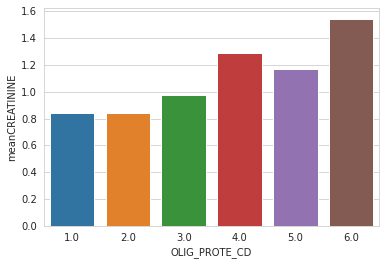

In [88]:
sns.barplot(data = df_health, x = 'OLIG_PROTE_CD', y = 'meanCREATININE')
#x = 요단백, y = 혈청크레아티닌의 평균
#요단백의 증가에 따라 혈청크레아티닌이 증가하는 것을 알 수 있다. 
#조사결과 
  #신장기능이 떨어지면 소변으로 단백질이 배출. 크레아티닌은 근육에서 생성되는 노폐물로 대부분 신장을 통해 배출돼 신장 기능의 좋은 지표.
  #실제로 현재 소변 단백질/크레아티닌 비율 검사는 소변에 포함된 단백질 양과 크레아티닌의 양의 비율을 계산하여 단백뇨를 평가하는 방법으로 많이 사용하는 검사. (24시간 요단백 검사보다 편리하기 때문에 많이 사용)

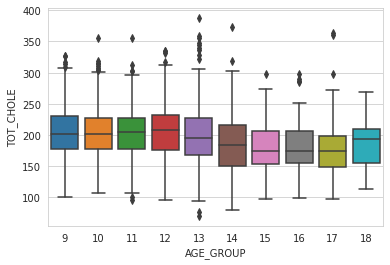

In [89]:
sns.boxplot(data = health, x = 'AGE_GROUP', y = 'TOT_CHOLE')
#나이와 총콜레스테롤 관계를 나타내는 상자그림이다.
#비교적 40~69세(9,10,11,12,13,14) 총콜레스테롤 극단치가 크다는 것을 알 수 있다.
#특히나 최댓값과 중앙값 모두 높은 55~59세(12)가 눈에 띈다.